# 41 Working with KML data

KML is a file format used to display geographic data in an Earth browser such as Google Earth. KML uses a tag-based structure with nested elements and attributes and is based on the XML standard.

<img src="../images/tutorial41_cover.png">

Source: https://developers.google.com/kml/documentation/kml_tut

## Set File Paths and download Tutorial Data

If you downloaded the latest `GemGIS` version from the Github repository, append the path so that the package can be imported successfully. Otherwise, it is recommended to install `GemGIS` via `pip install gemgis` and import `GemGIS` using `import gemgis as gg`. In addition, the file path to the folder where the data is being stored is set. The tutorial data is downloaded using Pooch (https://www.fatiando.org/pooch/latest/index.html) and stored in the specified folder. Use `pip install pooch` if Pooch is not installed on your system yet.

In [1]:
import gemgis as gg

file_path ='data/41_working_with_kml_data/'

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
gg.download_gemgis_data.download_tutorial_data(filename="41_working_with_kml_data.zip", dirpath=file_path)

## Loading the data

The data used for demonstration purposes here was downloaded from https://developers.google.com/kml/documentation/KML_Samples.kml. The different layers the KML consists of can be listed using fionas ``listlayers(...)`` function. When using GeoPandas, the KML driver has to be activated using ``gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'``. When loading a layer with GeoPandas, the driver needs to be provided as well as the layer name. If no layer is provided, only the first element will be loaded.

In [8]:
import geopandas as gpd
import fiona

gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'

layer_list = fiona.listlayers(file_path + 'KML_Samples.kml')
layer_list

['Placemarks',
 'Highlighted Icon',
 'Paths',
 'Google Campus',
 'Extruded Polygon',
 'Absolute and Relative']

### Loading Placemarks

In [16]:
gdf_placemarks = gpd.read_file(filename=file_path+'KML_Samples.kml', driver='KML' , layer='Placemarks')
gdf_placemarks

Name                                        Description  \
0    Simple placemark  Attached to the ground. Intelligently places i...   
1  Floating placemark        Floats a defined distance above the ground.   
2  Extruded placemark    Tethered to the ground by a customizable "tail"   

                                 geometry  
0   POINT Z (-122.08220 37.42229 0.00000)  
1  POINT Z (-122.08407 37.42200 50.00000)  
2  POINT Z (-122.08577 37.42157 50.00000)

### Loading Icon

In [10]:
gdf_highlight = gpd.read_file(filename=file_path+'KML_Samples.kml', driver='KML' , layer='Highlighted Icon')
gdf_highlight

Name Description                               geometry
0  Roll over this icon              POINT Z (-122.08565 37.42243 0.00000)

### Loading Paths

In [11]:
gdf_paths = gpd.read_file(filename=file_path+'KML_Samples.kml', driver='KML' , layer='Paths')
gdf_paths

Name                                        Description  \
0        Tessellated  If the <tessellate> tag has a value of 1, the ...   
1      Untessellated  If the <tessellate> tag has a value of 0, the ...   
2           Absolute                            Transparent purple line   
3  Absolute Extruded        Transparent green wall with yellow outlines   
4           Relative  Black line (10 pixels wide), height tracks ter...   
5  Relative Extruded  Opaque blue walls with red outline, height tra...   

                                            geometry  
0  LINESTRING Z (-112.08142 36.10678 0.00000, -11...  
1  LINESTRING Z (-112.08062 36.10673 0.00000, -11...  
2  LINESTRING Z (-112.26565 36.09448 2357.00000, ...  
3  LINESTRING Z (-112.25508 36.07955 2357.00000, ...  
4  LINESTRING Z (-112.25328 36.09887 645.00000, -...  
5  LINESTRING Z (-112.26566 36.09445 630.00000, -...

### Loading Google Campus

In [12]:
gdf_campus = gpd.read_file(filename=file_path+'KML_Samples.kml', driver='KML' , layer='Google Campus')
gdf_campus

Name Description                                           geometry
0  Building 40              POLYGON Z ((-122.08489 37.42257 17.00000, -122...
1  Building 41              POLYGON Z ((-122.08574 37.42227 17.00000, -122...
2  Building 42              POLYGON Z ((-122.08579 37.42136 25.00000, -122...
3  Building 43              POLYGON Z ((-122.08444 37.42177 19.00000, -122...

### Loading Polygon

In [13]:
gdf_polygon = gpd.read_file(filename=file_path+'KML_Samples.kml', driver='KML' , layer='Extruded Polygon')
gdf_polygon

Name Description                                           geometry
0  The Pentagon              POLYGON Z ((-77.05788 38.87253 100.00000, -77....

### Loading Absolute and Relative

In [14]:
gdf_absolute = gpd.read_file(filename=file_path+'KML_Samples.kml', driver='KML' , layer='Absolute and Relative')
gdf_absolute

Name Description  \
0           Absolute               
1  Absolute Extruded               
2           Relative               
3  Relative Extruded               

                                            geometry  
0  POLYGON Z ((-112.33725 36.14889 1784.00000, -1...  
1  POLYGON Z ((-112.33966 36.14638 1784.00000, -1...  
2  POLYGON Z ((-112.33495 36.14989 100.00000, -11...  
3  POLYGON Z ((-112.33488 36.15140 100.00000, -11...

## Plotting the Data

The data was just simply plotted to visualize the content of the KML file.

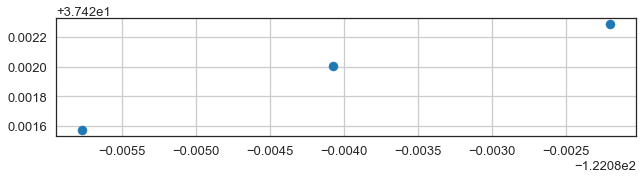

In [35]:
import matplotlib.pyplot as plt

gdf_placemarks.plot(aspect='equal')
plt.grid()

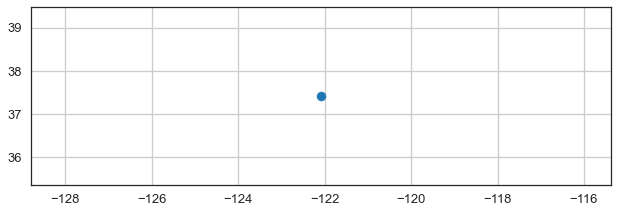

In [34]:
gdf_highlight.plot(aspect='equal')
plt.grid()

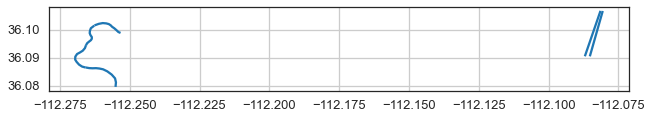

In [33]:
gdf_paths.plot(aspect='equal')
plt.grid()

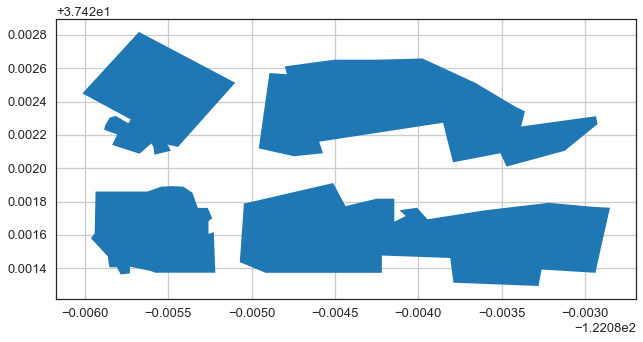

In [32]:
gdf_campus.plot(aspect='equal')
plt.grid()

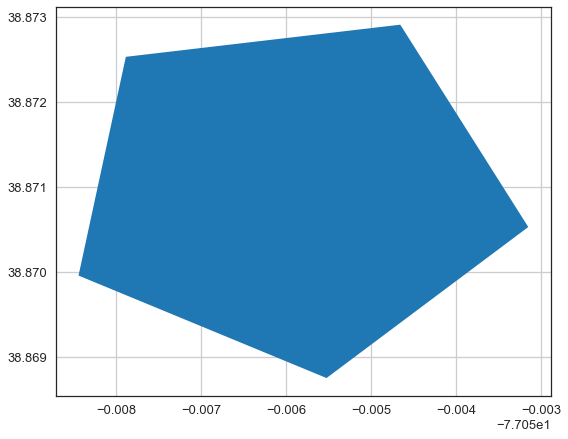

In [30]:
gdf_polygon.plot(aspect='equal')
plt.grid()

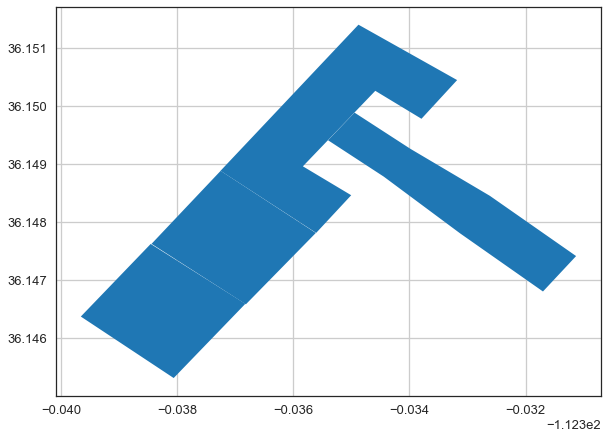

In [27]:
gdf_absolute.plot(aspect='equal')
plt.grid()